In [1]:
import pandas as pd
df = pd.read_csv("/content/LungCapData.csv")
df

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


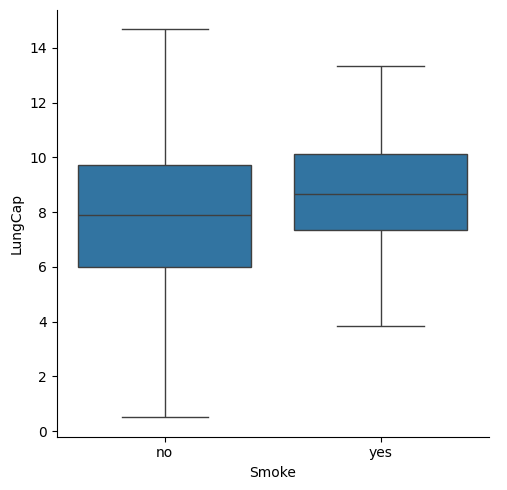

In [2]:
import seaborn as sns
sns.catplot(data=df, x="Smoke", y="LungCap", kind="box")

In [6]:
df['LungCap'][df['Smoke']== 'no'].median()

7.9

In [7]:
df['LungCap'][df['Smoke']== 'yes'].median()

8.65

# Ttest

In [8]:
from scipy import stats
stats.ttest_ind(df['LungCap'][df['Smoke']== 'no'],df['LungCap'][df['Smoke']== 'yes'],equal_var=False)

TtestResult(statistic=-3.649750522823789, pvalue=0.0003927364779843199, df=117.71871064770068)

In [9]:
df['LungCap'][df['Smoke']== 'yes'].var()

3.545291566985646

In [10]:
df['LungCap'][df['Smoke']== 'no'].var()

7.431694468363005

# Levene’s Test: The Assessment for Equality of Variances

In [11]:
stats.levene(df['LungCap'][df['Smoke']== 'yes'],df['LungCap'][df['Smoke']== 'no'])

LeveneResult(statistic=12.955230543446781, pvalue=0.00034080246885798225)

# The Wilcoxon Rank-Sum Test

In [12]:
stats.ranksums(df['LungCap'][df['Smoke']== 'yes'],df['LungCap'][df['Smoke']== 'no'])

RanksumsResult(statistic=2.774191810785126, pvalue=0.005533903949010097)

In [13]:
contingency_table = pd.crosstab(df['LungCap'],df['Smoke'])
contingency_table

Smoke,no,yes
LungCap,,
0.507,1,0
1.025,1,0
1.125,1,0
1.175,1,0
1.325,1,0
...,...,...
13.375,3,0
13.875,1,0
14.375,1,0


#Chi Square

In [15]:
from scipy.stats import chi2

# Degrees of freedom
df = 2

# Significance level
alpha = 0.05

# Right-tailed chi-square critical value
critical_value = chi2.ppf(1 - alpha, df)

print(f"Chi-square critical value ({1 - alpha} significance level) for df = {df} is {round(critical_value, 4)}")

Chi-square critical value (0.95 significance level) for df = 2 is 5.9915


# Example

In [19]:
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Create a contingency table
observed = np.array([[67, 213, 74],
                     [411,633,129],
                     [85,51,7],
                     [27,60,15]])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

# Choose significance level
alpha = 0.05


rows = 3
columns = 3
#dof = (rows-1)(columns-1)
dof=4
critical_value = chi2.ppf(1 - alpha, dof)

# Print results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Compare p-value with significance level
if p_val < alpha:
    print("Reject the null hypothesis (There is a significant difference between diabetes and education level).")
else:
    print("Fail to reject the null hypothesis (There is no significant difference between diabetes and education level).")

# Compare statistic and critical value
if chi2_stat > critical_value:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Chi-square statistic: 94.26880078578765
P-value: 3.925170647869838e-18
Degrees of freedom: 4
Expected frequencies:
[[117.86681716 191.18397291  44.94920993]
 [390.55869074 633.49943567 148.94187359]
 [ 47.61286682  77.22968397  18.15744921]
 [ 33.96162528  55.08690745  12.95146727]]
Reject the null hypothesis (There is a significant difference between diabetes and education level).
Reject the null hypothesis


The purpose of a​ chi-square homogeneity test is to compare the distributions of a variable of two or more populations. For a​ chi-square homogeneity​ test, the null hypothesis is that the distributions of the variable are the same for all the​ populations, and the alternative hypothesis is that the distributions of the variable are not all the same